In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r'dataset.csv')
df=df[['v1', 'v2']]
df.head()  #Returns the first 5 rows of the dataframe. To override the default, you may insert a value between the parenthesis to change the number of rows returned. ... tail() Returns the last 5 rows of the dataframe.

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()  # is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Whether to print the full summary. By default, the setting in pandas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df['Spam']=pd.get_dummies(df['v1'], drop_first=True)  # creating spam column and giving values 0 and 1 to ham and spam respec.
df=df.drop('v1', axis=1)
df.head()

,v2,Spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


<AxesSubplot:xlabel='Spam', ylabel='count'>

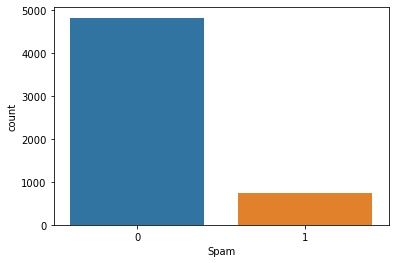

In [5]:
sns.countplot(x='Spam',data=df)  #used to Show the counts of observations in each categorical bin using bars

In [6]:
import re
import string
from string import punctuation
from nltk.corpus import stopwords 
def text_processing(message):
    
    Stopwords = stopwords.words('english') #to remove meaningless words 
# Check characters to see if they are in punctuation
    no_punctuation = [char for char in message if char not in string.punctuation]
# Join the characters again to form the string
    no_punctuation = ''.join(no_punctuation)
    
# Now just remove any stopwords
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in Stopwords])
df['text'] = df['v2'].apply(text_processing)
df.head()

,v2,Spam,text
0,"Go until jurong point, crazy.. Available only ...",0,Go jurong point crazy Available bugis n great ...
1,Ok lar... Joking wif u oni...,0,Ok lar Joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,Free entry 2 wkly comp win FA Cup final tkts 2...
3,U dun say so early hor... U c already then say...,0,U dun say early hor U c already say
4,"Nah I don't think he goes to usf, he lives aro...",0,Nah dont think goes usf lives around though


In [7]:
from sklearn.model_selection import train_test_split
X=df['text'].values                                                  #END  END    END 
y=df['Spam'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#train_test_split function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#Vectorization
bow = CountVectorizer()
X_train = bow.fit_transform(X_train)
X_test = bow.transform(X_test)
#Term Frequency, Inverse Document Frequency
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)  
X_train=X_train.toarray()
X_test=X_test.toarray()

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
model = Sequential()
model.add(Dense(units=8270,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=400,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model.fit(x=X_train,y=y_train,epochs=40,validation_data=(X_test, y_test), verbose=1,callbacks=[early_stop])

Epoch 1/40
140/140 [==============================] - 103s 708ms/step - loss: 0.3004 - val_loss: 0.1015
Epoch 2/40
140/140 [==============================] - 97s 690ms/step - loss: 0.0337 - val_loss: 0.1284
Epoch 3/40
140/140 [==============================] - 99s 710ms/step - loss: 0.0067 - val_loss: 0.2066
Epoch 4/40
140/140 [==============================] - 99s 704ms/step - loss: 7.7735e-04 - val_loss: 0.2433
Epoch 5/40
140/140 [==============================] - 93s 662ms/step - loss: 9.6572e-05 - val_loss: 0.3559
Epoch 6/40
140/140 [==============================] - 96s 687ms/step - loss: 1.5027e-06 - val_loss: 0.3550
Epoch 7/40
140/140 [==============================] - 102s 725ms/step - loss: 8.2621e-04 - val_loss: 0.3657
Epoch 8/40
140/140 [==============================] - 102s 728ms/step - loss: 4.2959e-05 - val_loss: 0.3647
Epoch 9/40
140/140 [==============================] - 103s 733ms/step - loss: 1.0151e-06 - val_loss: 0.3647
Epoch 10/40
140/140 [========================

In [11]:
predictions = model.predict_classes(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

C:\Users\mitta\miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[962   3]
 [ 21 129]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.86      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

